In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [4]:
hospitals = pd.read_csv('HospitalAdmissionsData.csv')

hospitals.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [5]:
hospitals.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [20]:
d_types = list(map(lambda x: str(type(hospitals.iloc[0][x])), hospitals.columns))

print(d_types)
print("Int = ", d_types.count("<class 'numpy.int64'>"))
print("Float = ", d_types.count("<class 'numpy.float64'>"))

["<class 'numpy.int64'>", "<class 'numpy.float64'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'numpy.int64'>", "<class 'str'>", "<class 'str'>"]
Int =  4
Float =  1


In [24]:
hospitals['Insurance_Type'].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [26]:
hospitals['AdmissionLengthDays'].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [30]:
print(hospitals["Admission_Type"].value_counts().nlargest(n=1))
print(hospitals["Insurance_Type"].value_counts().nlargest(n=1))
print(hospitals["Religion_Type"].value_counts().nlargest(n=1))
print(hospitals["Race"].value_counts().nlargest(n=1))
print(hospitals["Dx"].value_counts().nlargest(n=1))

emergency    41987
Name: Admission_Type, dtype: int64
medicare    28157
Name: Insurance_Type, dtype: int64
catholic    20561
Name: Religion_Type, dtype: int64
white    40927
Name: Race, dtype: int64
newborn    7823
Name: Dx, dtype: int64


Text(0.5, 1.0, 'Histogram of Admission Length Days')

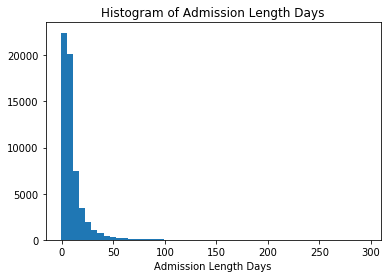

In [38]:
plt.hist(hospitals['AdmissionLengthDays'], bins=50)
plt.xlabel("Admission Length Days")
plt.title("Histogram of Admission Length Days")

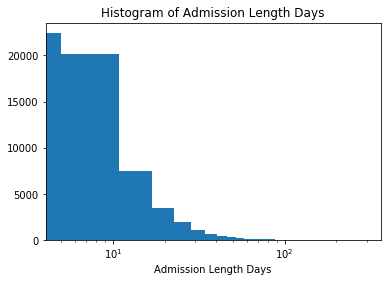

In [39]:
plt.hist(hospitals['AdmissionLengthDays'], bins=50)
plt.xlabel("Admission Length Days")
plt.title("Histogram of Admission Length Days")
plt.xscale('log')

10.129605856532638 10.140012332344476


Text(0.5, 1.0, 'Average Length Days for Dead and Alive Patients')

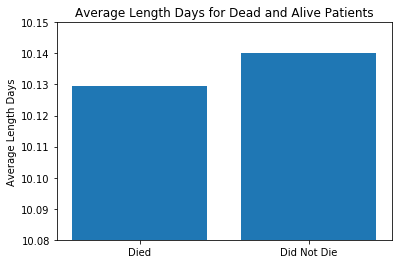

In [49]:
deaths = hospitals.loc[hospitals['Death_1'] == 1]['AdmissionLengthDays'].mean()
alives = hospitals.loc[hospitals['Death_1'] == 0]['AdmissionLengthDays'].mean()

print(deaths, alives)

plt.bar(["Died", "Did Not Die"], height=[deaths, alives])
plt.ylim(10.08, 10.15)
plt.ylabel("Average Length Days")
plt.title("Average Length Days for Dead and Alive Patients")

('medicare', 28157)
('private', 22534)
('medicaid', 5781)
('government', 1781)
('self pay', 610)


Text(0, 0.5, 'Death Proportion')

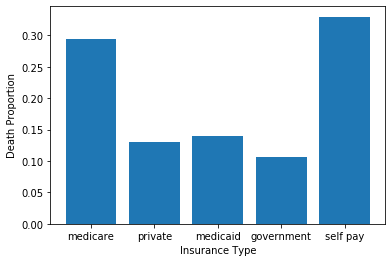

In [68]:
x = hospitals['Insurance_Type'].value_counts()

ins = []
pro = []
for ins_type in zip(x.index, x.values):
    print(ins_type)
    y = hospitals.loc[hospitals['Insurance_Type'] == ins_type[0]]['Death_1'].mean()
    ins.append(ins_type[0])
    pro.append(y)
    
pro = np.array(pro)
pro = pro / np.sum(pro)

plt.bar(ins, pro)
plt.xlabel("Insurance Type")
plt.ylabel("Death Proportion")

Text(0.5, 1.0, 'Signal 3')

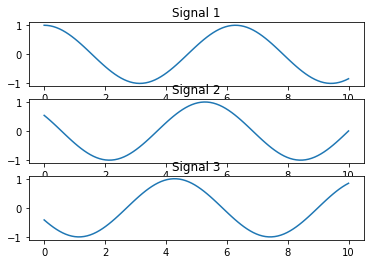

In [78]:

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

plt.subplot(311)
plt.plot(x, y1)
plt.title("Signal 1")
plt.subplot(312)
plt.plot(x, y2)
plt.title("Signal 2")
plt.subplot(313)
plt.plot(x, y3)
plt.title("Signal 3")
